In [1]:
# this notebook demonstrates how to load in a NMRPipe processedd NUS-2D-HSQC NMR spectrum,
# phase and baseline correct the spectrum and save as MetaboLabPy dataset
# import packages
import os
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import math
import scipy as sp
from scipy import optimize
%matplotlib notebook
from jupyterthemes import jtplot
jtplot.style()
from sklearn.decomposition import FastICA, PCA
from metabolabpy.nmr import nmrDataSet
from metabolabpy.nmr import hsqcData
import webbrowser

In [2]:
# download data file
url = 'https://www.dropbox.com/sh/0n4r8jn4klcq041/AAB07C6Zg1UNLv53kQFFYruba?dl=1'
webbrowser.open(url)

True

max_level: 0.1, min_level: 0.01, n_levels: 8


<IPython.core.display.Javascript object>


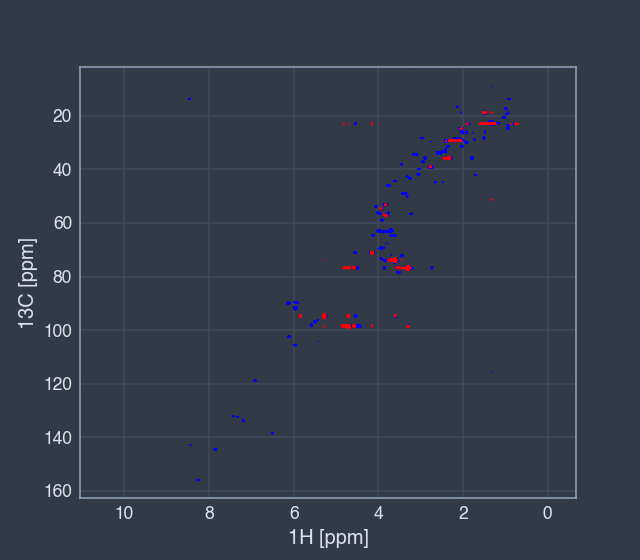

In [3]:
# please change download directory if Downloads is not in the user's home folder
download_dir = os.path.join(os.path.expanduser('~'), "Downloads")
# create NmrDataSet object, open sample spectrum, load into NmrDataSet object and plot
nd = nmrDataSet.NmrDataSet()
nmr_dataset = os.path.join(download_dir, "sample_2d_spc")
nd.read_nmrpipe_spc(nmr_dataset, "1", "test.dat")
nd.set_standard_plot_colours()
nd.keep_zoom = False
# phase correct spectrum
nd.nmrdat[0][0].proc.ph0[0] = 143.3939
nd.nmrdat[0][0].proc.ph0[1] = 0.6158
nd.nmrdat[0][0].proc.ph1[0] = 165.8430
nd.nmrdat[0][0].proc.ph1[1] = 0.9333
nd.nmrdat[0][0].phase2d(nd.nmrdat[0][0].proc.ph0[0], nd.nmrdat[0][0].proc.ph1[0], 0)
nd.nmrdat[0][0].phase2d(nd.nmrdat[0][0].proc.ph0[1], nd.nmrdat[0][0].proc.ph1[1], 1)
# reference spectrum
nd.nmrdat[0][0].ref_shift[0] = 1.314
nd.nmrdat[0][0].ref_shift[1] = 22.8972
nd.nmrdat[0][0].ref_point[0] = 156
nd.nmrdat[0][0].ref_point[1] = 2142
nd.nmrdat[0][0].calc_ppm()
# baseline correct spectrum
poly_order = [16, 16]
threshold = 0.05
nd.nmrdat[0][0].autobaseline2d(poly_order, threshold)
# plot spectrum
d = nd.nmrdat[0][0].display
print("max_level: {}, min_level: {}, n_levels: {}".format(d.max_level, d.min_level, d.n_levels))
d.max_level = 0.01
d.min_level = 0.003
d.n_levels = 34
nd.plot_spc()

In [4]:
nd.save(os.path.join(download_dir, "sample_2d_spc.mlpy"))